# Numerical Exercises 01

Before running this notebook, you need to:
 - compile: 
   - `cmake -S . -B build -DCMAKE_BUILD_TYPE=Release`
   - `cmake --build build/ -j <NUM_OF_CORES>` 
 - execute: 
   - `cd build`
   - `for i in {1..3}; do ./ex01.$i; done`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, cauchy
import math
import matplotlib.style as style
style.use('tableau-colorblind10')

## Exercises 01.1 01.2

In this exercises we test the pseudo-random number generator that we will use throughout the course. 
To do so we evaluate the mean value $\langle r \rangle$ (ex 01.1) and the variance $ \sigma^2 $ (ex 01.2) of a random number taken from a uniform distribution in $[0,1)$. 

The expected values are: 
 - $\langle r \rangle = \int_0^1 r dr = 1/2$
 - $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$

To compute the uncertainties related to this quantities we use the **blocking method**, dividing our simulation in $N$ iterations, or **blocks**, with $M/N$ throws in each block. For each block we calculate a value and its standard deviation; at the end we average the estimation of the mean and compute the error value by considering progressively $i = 1, 2, ..., N$ blocks. This *modus operandi* is backed up by the *Central Limit Theorem*, which guarantees that the best result for $i = 1, ..., N$ blocks will be given by the average of the values of the single blocks and the uncertainty will be given by the standard deviation of the average of the $i$ blocks.

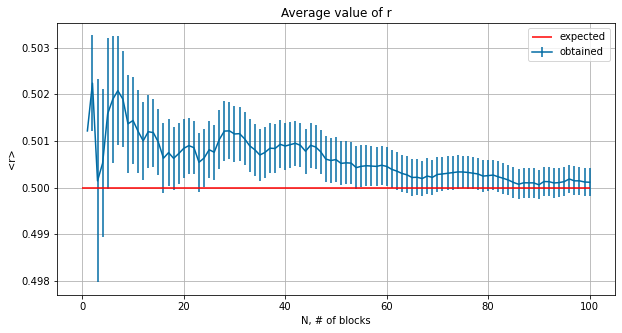

In [3]:
fig=plt.figure(figsize=(10,5))

N, r, error = np.loadtxt("build/results01.1.1.dat", usecols=(0,1,2), delimiter=" ", unpack=True)
plt.errorbar(N,r,yerr=error, label='obtained')
plt.xlabel('N, # of blocks')
plt.ylabel('<r>')
plt.title("Average value of r")
plt.hlines(0.5, 0, 100, color='red', label='expected')
plt.grid(True)
plt.legend()
plt.show()

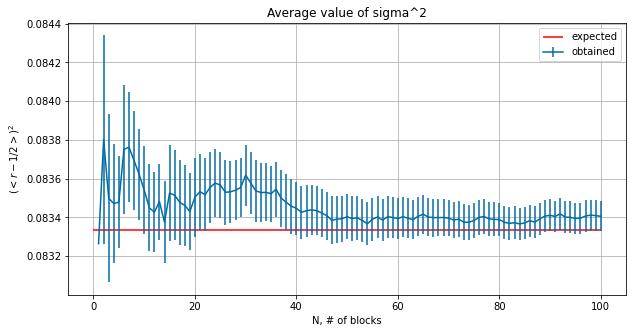

In [4]:
fig=plt.figure(figsize=(10,5))

N, r, error = np.loadtxt("build/results01.1.2.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.hlines(1./12, 0, 100, color='red', label='expected')
plt.errorbar(N,r,yerr=error, label='obtained')
plt.xlabel('N, # of blocks')
plt.legend()
plt.ylabel('$(<r-1/2>)^2$')
plt.title("Average value of sigma^2")
plt.grid(True)
plt.show()

## Exercise 01.1.3

Now we want to prove that the PRNG is not as uniform as we can expect, being it a deterministic algorithm. To do so, we use the $\chi^2$ test, remembering that a large value of $\chi^2$ indicates that our hypothesis ($n_i$ are drawn from a uniform distribution) is unlikely.

To calculate it we divide $[0,1)$ in $N$ subintervals, then we sample our *uniform distribution* $M$ times, and we count how many numbers fall into each subinterval, and finally obtain it via

$$
\chi^2 = \sum_{i=i}^{N}\dfrac{(n_i - E_i)^2}{E_i}
$$

where $E_i = M/N$. For counting experiments the theoretical probability distribution is the *binomial distribution*, which yealds $E_i = M/N$ and a variance $\sigma_i^2=M/N(1-1/N)$. By setting $N=100$, it follows that $\sigma^2_i\simeq M/N = E_i$, and so for each iteration we should have $\chi^2 = \sum_i^{100} 1 = 100$. 

By looking at the graph below we can see that the $\chi^2$ are distributed around $100$, and thus proving our hypothesis wrong.

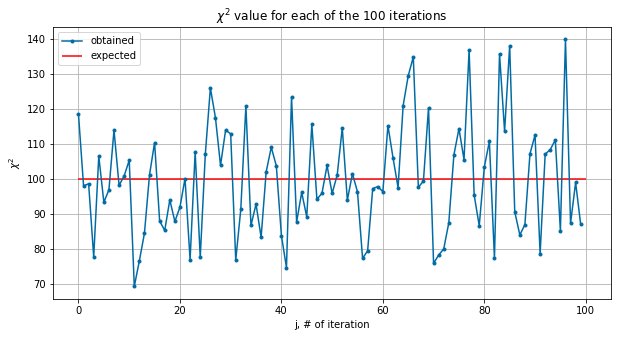

mean value =  99.66279999999999


In [5]:
chi =np.loadtxt("build/results01.1.3.dat", delimiter=' ', unpack=True)

fig=plt.figure(figsize=(10, 5))
plt.plot(chi, linestyle="-", marker=".", label='obtained')
plt.hlines(100, 0, 100, color='red', label='expected')
plt.xlabel('j, # of iteration')
plt.ylabel('$\chi^2$')
plt.legend()
plt.title('$\chi^2$ value for each of the 100 iterations')
plt.grid(True)
plt.show()
print("mean value = ", np.mean(chi))

## Exercise 01.2
The main scope of this exercise is to check the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem), in particular the following consequences:

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
For a given $N$, the sum of the independent and identically distributed random numbers $\{X_i\}_{i=1}^N$, with $\mu=\mathbb E[X_i]$, $Var[X_i]=\sigma^2 < \infty$ and $S_N= \frac{1}{N} \sum_{i=1}^N X_i$ converges in distribution to a normal distribution for $N \to \infty$:
$$
\sqrt{N}(S_N -\mu) \to \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}\big(\frac{S_N -\mu}{\sigma}\big)^2}
$$
</p>

So, we extended the class `Random` adding two other distributions: 
- exponential $p(x)=\lambda e^{-\lambda x},$ with $x \in [0, \infty)$
- Cauchy-Lorentz $p(x) = \frac{1}{\pi} \frac{\Gamma}{(x-\mu)^2 + \Gamma^2}$, with $x \in (-\infty, \infty)$

obtained via the method of **inversion of the cumulative distribuion**.

The parameters are set to $\lambda=1$, $\mu =0$, $\Gamma=1$. The variance, $Var[X] = \mathbb E[X^2] - \mathbb E[X]^2$, is then:
- $Var[X]=\sigma^2= 1/12$ for a uniform distribution on $[0,1)$;
- $Var[X]=1/\lambda^2=1$ for the exponential distribution;
- _not defined_ for the Cauchy-Lorentz distribution.

In fact, the last case does not meet the hypothesis of CLT, because $\sigma_{CL}^2$ is not finite; what's more, the Cauchy-Lorentz distribution is itself an attractor in the distribution space due to its stability.

The graphs below are obtained by drawing for $M=10^4$ times $N=1,2, 10, 100$ random numbers and by filling the histograms for $S_N$. 
For $N=100$ we also show the fit of our data (orange line). The lorentzian case exhibits the expected behaviour: for any $N$ the distribution of $S_N$ is the lorentzian distribution itself.

Gaussian fit: 
 mean =  0.5000108001 
 std dev =  0.029037794697737294


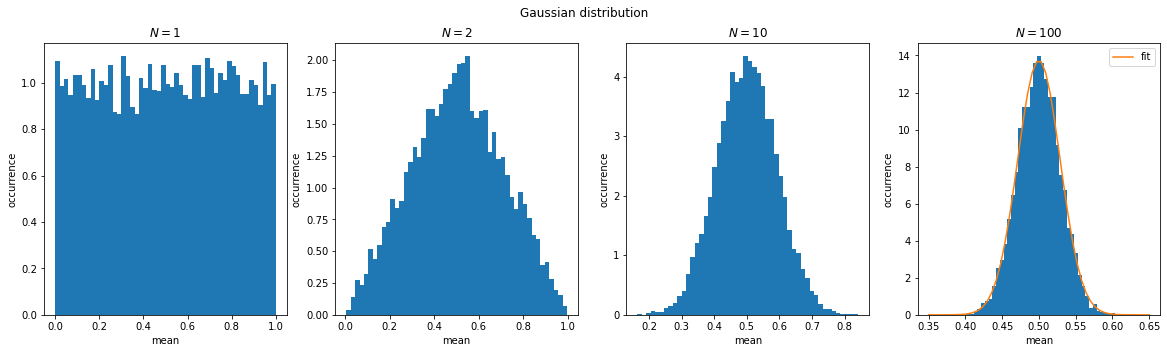

In [5]:
M=10000
graf= '1', '2', '10', '100'

fig=plt.figure(figsize=(20, 5))
plt.suptitle('Gaussian distribution')

for i in range(4):
    gaus = np.loadtxt("build/results01.2.gauss.dat", skiprows=i*M, max_rows=M, unpack= True)
    plt.subplot(1,4,i+1)
    plt.hist(gaus,50, density=True)
    plt.title(r'$N='+graf[i]+'$')
    plt.xlabel('mean')
    plt.ylabel('occurrence')
    plt.grid(False)
    if i==3 :
        parameter = norm.fit(gaus) 
        x = np.linspace(0.35, 0.65, 50) 
        y = norm.pdf(x, *parameter) 
        plt.plot(x, y, label='fit')
        plt.legend()

mu, std = norm.fit(gaus)

print("Gaussian fit: \n mean = ", mu, "\n std dev = ", std)

plt.show()

Gaussian fit: 
 mean =  0.9998264965999999 
 std dev =  0.09851158906206817


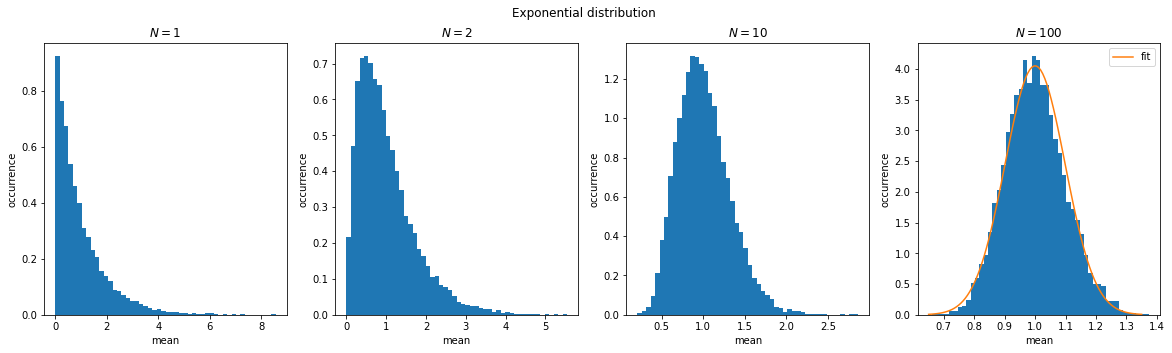

In [6]:
fig=plt.figure(figsize=(20, 5))
plt.suptitle('Exponential distribution')

for i in range(4):
    exp = np.loadtxt("build/results01.2.exp.dat", skiprows=i*M, max_rows=M, unpack= True)
    plt.subplot(1,4,i+1)
    plt.hist(exp,50, density=True)
    plt.title(r'$N='+graf[i]+'$')
    plt.xlabel('mean')
    plt.ylabel('occurrence')
    plt.grid(False)
    if i==3 :
        parameter = norm.fit(exp) 
        x = np.linspace(0.65, 1.35, 100) 
        y = norm.pdf(x, *parameter)
        plt.plot(x, y, label='fit')
        plt.legend()

mu, std = norm.fit(exp)

print("Gaussian fit: \n mean = ", mu, "\n std dev = ", std)

plt.show()

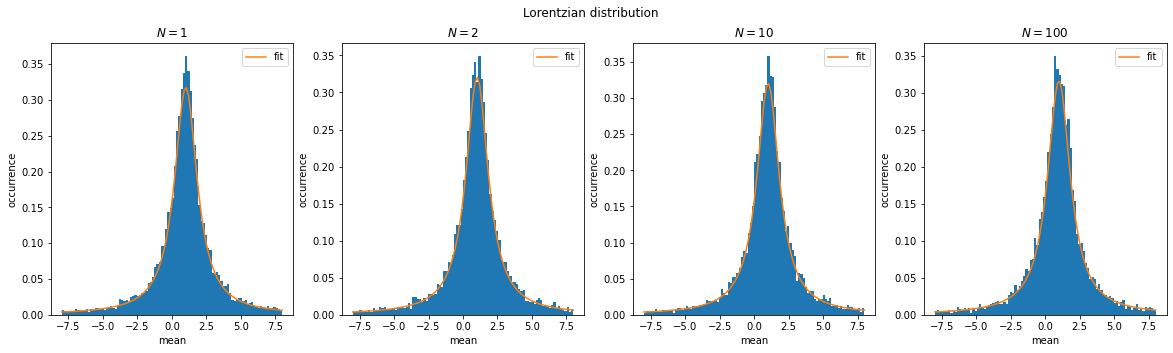

In [7]:
fig=plt.figure(figsize=(20, 5))
plt.suptitle('Lorentzian distribution')

for i in range(4):
    lor = np.loadtxt("build/results01.2.lorentz.dat", skiprows=i*M, max_rows=M, unpack= True)
    plt.subplot(1,4,i+1)
    plt.hist(lor,100, range=(-8,8), density=True)
    plt.title(r'$N='+graf[i]+'$')
    plt.xlabel('mean')
    plt.ylabel('occurrence')
    plt.grid(False)
    parameter = cauchy.fit(lor) 
    x = np.linspace(-8, 8, 100)
    y = cauchy.pdf(x, *parameter)
    plt.plot(x, y, label='fit')
    plt.legend()

plt.show()

# Exercise 01.3

The goal of this exercise is to simulate the [Buffon's needle problem](https://en.wikipedia.org/wiki/Buffon%27s_needle_problem). The purpose is to compute $\pi$ throwing needles with lenght $L$ randomly onto a horizontal plane ruled with straight lines at distance $d$. The result is that:

$$ \pi = \dfrac{2\,L\,N_{th}}{N_{hit}\,d} $$

where $N_{th}$ are the number of throws, and $N_{hit}$ the number of intersections with lines.

To do so we:
- randomly choose $x, y \in [0,d)$;
- calculate $\theta= \arccos \big(\frac{x}{\sqrt{x^2+y^2}} \big)$, where we only keep the points generated within a unit semicircle in order to compute the uniform distribution between $[0,\pi)$.
- check if there is an intersection with the lines, and update the counters consequently

As before, we have in total $M =10^5$ random variables, drawn from a uniform distribution  and divided in $N=100$ blocks, and we show the increasing precision gained with the increase in the blocks considered for our estimate.

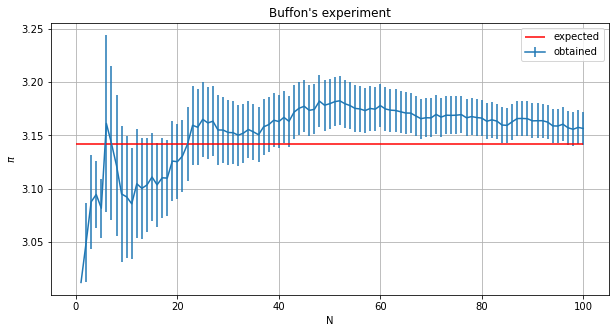

In [8]:
x,y,err=np.loadtxt("build/results01.3.dat",usecols=(0,1,2),unpack=True)

fig=plt.figure(figsize=(10, 5))
plt.errorbar(x,y,yerr=err, label='obtained')
plt.hlines(3.1415926, 0, 100, color='red', label='expected')
plt.xlabel('N')
plt.ylabel('$\pi$', )
plt.grid(True)
plt.title("Buffon's experiment")
plt.legend()
plt.show()